In [ ]:
import os 
from tqdm import tqdm
dossier = 'C:/Users/portable_laura/Documents/coursM1/M√©moire/Sources/ocr_sorted'

#Potentiellement plus pratique d'utiliser des listes de mots 
# Ou des listes de listes de mots (une liste par texte) pour pouvoir r√©aliser des comparaisons

import os
from tqdm import tqdm

batch_size = 1000
fichier_progression = 'C:/Users/portable_laura/Desktop/memoire_prod_finale/data/progress.txt'
fichier_stopword = 'french_stopwords.txt'

# Lister les fichiers valides
fichiers_txt = [f for f in sorted(os.listdir(dossier)) 
                if f.endswith('.txt') and f != fichier_stopword]

if os.path.exists(fichier_progression):
    with open(fichier_progression, 'r') as f:
        start_index = int(f.read().strip())
else:
    start_index = 0

end_index = min(start_index + batch_size, len(fichiers_txt))
batch = fichiers_txt[start_index:end_index]

# Lire les fichiers du lot actuel
longue_chaine = ''
for fichier in tqdm(batch, desc=f"Traitement des fichiers {start_index} √† {end_index-1}"):
    with open(os.path.join(dossier, fichier), 'r', encoding='utf-8') as f:
        longue_chaine += f.read()

# Sauvegarder la nouvelle progression
with open(fichier_progression, 'w') as f:
    f.write(str(end_index))


print(f"Termin√© : {len(batch)} fichiers trait√©s.")
if end_index < len(fichiers_txt):
    print(f"Relance le script pour traiter les fichiers {end_index} √† {min(end_index+batch_size, len(fichiers_txt))-1}")
else:
    print("Tous les fichiers ont √©t√© trait√©s.")


Traitement des fichiers 7000 √† 7165: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 166/166 [00:10<00:00, 15.11it/s]

Termin√© : 166 fichiers trait√©s.
Tous les fichiers ont √©t√© trait√©s.


In [ ]:
import os
from tqdm import tqdm 


def ouvrir_decennie(chemin,decennie):
    texte_fin = ''

    fichiers = [f for f in os.listdir(chemin) if f.endswith('.txt')]
    fichiers_decennie = []

    for fichier in fichiers:
        try:
            annee = int(fichier.split('-')[0])
            if decennie <= annee < decennie + 10:
                fichiers_decennie.append(fichier)
        except ValueError:
            print(f"Nom de fichier ignor√© : {fichier}")

    fichiers_decennie.sort()

    for fichier in tqdm(fichiers_decennie):
        chemin = os.path.join(dossier, fichier)
        with open(chemin, 'r', encoding='utf-8') as f:
            texte_fin += f.read()

    print(f"{len(fichiers_decennie)} fichiers charg√©s pour la d√©cennie {decennie}s.")
    return texte_fin


#===============================================
decennie = 1880
chemin = 'C:/Users/portable_laura/Documents/coursM1/M√©moire/Sources/ocr_sorted'

#===============================================

longue_chaine_decennie = ouvrir_decennie(chemin,decennie)


1168 fichiers charg√©s pour la d√©cennie 1880s.


In [ ]:
len(longue_chaine_decennie)

48804056

In [25]:
import re
from collections import defaultdict
from tqdm import tqdm

def similarite_texte(texte1, texte2, seuil=0.8):
    """Mesure la similarit√© entre deux textes avec la distance de Jaccard"""
    # D√©couper le texte en trigrammes (ou n-grammes de taille 3)
    #===============================================
    n = 3
    #Param√®tre usuel mais pouvant √™tre modifi√©
    #===============================================

    def get_ngrams(texte, n):
        return set([texte[i:i+n] for i in range(len(texte) - n + 1)])

    ngrams1 = get_ngrams(texte1, n)
    ngrams2 = get_ngrams(texte2, n)


    intersection = len(ngrams1.intersection(ngrams2))
    union = len(ngrams1.union(ngrams2))
    #Calcul de la similarit√© avec la distance de Jaccard
    return intersection / union if union != 0 else 0

def compter_cooccurrences(texte, mot1, mot2, taille_fenetre=5, seuil_similarite=0.8):
    # Nettoyage du texte
    texte = texte.lower()
    mots = re.findall(r'\b\w+\b', texte)

    compteur = 0
    occurences = []
    for i in range(len(mots) - taille_fenetre + 1):
        fenetre = mots[i:i + taille_fenetre]
        if {mot1, mot2}.issubset(set(fenetre)):
            compteur += 1
            # Mettre en √©vidence les mots dans la fen√™tre
            fenetre_mise_en_evidence = [
                f"**{mot}**" if mot == mot1 or mot == mot2 else mot for mot in fenetre
            ]
            fenetre_texte = " ".join(fenetre_mise_en_evidence)

            # Comparer la fen√™tre actuelle avec les fen√™tres pr√©c√©dentes
            if all(similarite_texte(fenetre_texte, occ) < seuil_similarite for occ in occurences):
                occurences.append(fenetre_texte)

    return compteur, occurences


#===========================================================
texte = longue_chaine 
mot1 = "travaux"
mot2 = "canal"
#===========================================================
#Taille de la fen√™tre pouvant √™tre modifi√©e
resultat, occurences = compter_cooccurrences(texte, mot1, mot2, 30, 0.8)
#===========================================================

print(f"Le nombre de cooccurrences de '{mot1}' et '{mot2}' est : {resultat}")

print("\nVoici les fen√™tres o√π les mots coexistent (sans r√©p√©titions) :")
for occurence in occurences:
    print(f"- {occurence}")


Le nombre de cooccurrences de 'travaux' et 'canal' est : 4828

Voici les fen√™tres o√π les mots coexistent (sans r√©p√©titions) :
- de commissaire du gouvernement pour assister le ministre des **travaux** publics devant la chambre des d√©put√©s et devant le s√©nat dans la discussion du projet de loi relatif au **canal**
- pour assister le ministre des **travaux** publics devant la chambre des d√©put√©s et devant le s√©nat dans la discussion du projet de loi relatif au **canal** de dombasle √† saint
- des d√©put√©s et devant le s√©nat dans la discussion du projet de loi relatif au **canal** de dombasle √† saint di√© art 2 le ministre des **travaux** publics est charg√©
- s√©nat dans la discussion du projet de loi relatif au **canal** de dombasle √† saint di√© art 2 le ministre des **travaux** publics est charg√© de l ex√©cution du pr√©sent
- du projet de loi relatif au **canal** de dombasle √† saint di√© art 2 le ministre des **travaux** publics est charg√© de l ex√©cution du pr√©sent d

In [24]:
import re
from collections import defaultdict
from tqdm import tqdm

def similarite_texte(texte1, texte2, seuil=0.8):
    """Mesure la similarit√© entre deux textes avec la distance de Jaccard"""
    n = 3  # taille des n-grammes
    def get_ngrams(texte, n):
        return set([texte[i:i+n] for i in range(len(texte) - n + 1)])

    ngrams1 = get_ngrams(texte1, n)
    ngrams2 = get_ngrams(texte2, n)

    intersection = len(ngrams1.intersection(ngrams2))
    union = len(ngrams1.union(ngrams2))

    return intersection / union if union != 0 else 0

def compter_cooccurrences(texte, mot1, mot2, taille_fenetre=5, seuil_similarite=0.8):
    texte = texte.lower()
    mots = re.findall(r'\b\w+\b', texte)

    compteur = 0
    occurences = []

    for i in tqdm(range(len(mots) - taille_fenetre + 1)):
        fenetre = mots[i:i + taille_fenetre]

        if {mot1, mot2}.issubset(set(fenetre)):
            fenetre_simple = " ".join(fenetre)

            # V√©rifie que cette fen√™tre n'est pas trop similaire aux pr√©c√©dentes
            if all(similarite_texte(fenetre_simple, re.sub(r'\*\*', '', occ)) < seuil_similarite for occ in occurences):
                compteur += 1
                fenetre_mise_en_evidence = [
                    f"**{mot}**" if mot == mot1 or mot == mot2 else mot for mot in fenetre
                ]
                occurences.append(" ".join(fenetre_mise_en_evidence))

    return compteur, occurences

#===========================================================
texte = longue_chaine  # Assure-toi que cette variable est bien d√©finie avant
mot1 = "travaux"
mot2 = "canal"
#===========================================================

resultat, occurences = compter_cooccurrences(texte, mot1, mot2, 30, 0.8)

print(f"\nLe nombre de cooccurrences de '{mot1}' et '{mot2}' est : {resultat}\n")
print("Voici les fen√™tres o√π les mots coexistent (sans r√©p√©titions) :")
for occurence in occurences:
    print(f"- {occurence}")


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 34462205/34462205 [05:53<00:00, 97500.27it/s] 



Le nombre de cooccurrences de 'travaux' et 'canal' est : 1002

Voici les fen√™tres o√π les mots coexistent (sans r√©p√©titions) :
- de commissaire du gouvernement pour assister le ministre des **travaux** publics devant la chambre des d√©put√©s et devant le s√©nat dans la discussion du projet de loi relatif au **canal**
- pour assister le ministre des **travaux** publics devant la chambre des d√©put√©s et devant le s√©nat dans la discussion du projet de loi relatif au **canal** de dombasle √† saint
- des d√©put√©s et devant le s√©nat dans la discussion du projet de loi relatif au **canal** de dombasle √† saint di√© art 2 le ministre des **travaux** publics est charg√©
- s√©nat dans la discussion du projet de loi relatif au **canal** de dombasle √† saint di√© art 2 le ministre des **travaux** publics est charg√© de l ex√©cution du pr√©sent
- du projet de loi relatif au **canal** de dombasle √† saint di√© art 2 le ministre des **travaux** publics est charg√© de l ex√©cution du pr√©sent 

In [ ]:
import spacy
from collections import Counter

nlp = spacy.load("fr_core_news_md")
nlp.max_length = 600000

def cooccurrence_spacy_par_chunks(texte, mot1, mot2, taille_chunk=500_000):
    total_cooccurrences = 0
    texte = texte.lower()

    # D√©coupage du texte en morceaux
    for i in range(0, len(texte), taille_chunk):
        chunk = texte[i:i+taille_chunk]
        doc = nlp(chunk)
        for phrase in doc.sents:
            tokens = [token.text for token in phrase]
            if mot1 in tokens and mot2 in tokens:
                total_cooccurrences += 1

    return total_cooccurrences


#================================================
texte = longue_chaine  # Texte tr√®s long
mot1 = "canal"
mot2 = "travaux"
#================================================

res = cooccurrence_spacy_par_chunks(texte, mot1, mot2)
print(f"Nombre de phrases contenant '{mot1}' et '{mot2}': {res}")


KeyboardInterrupt: 

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\portable_laura\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\portable_laura\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


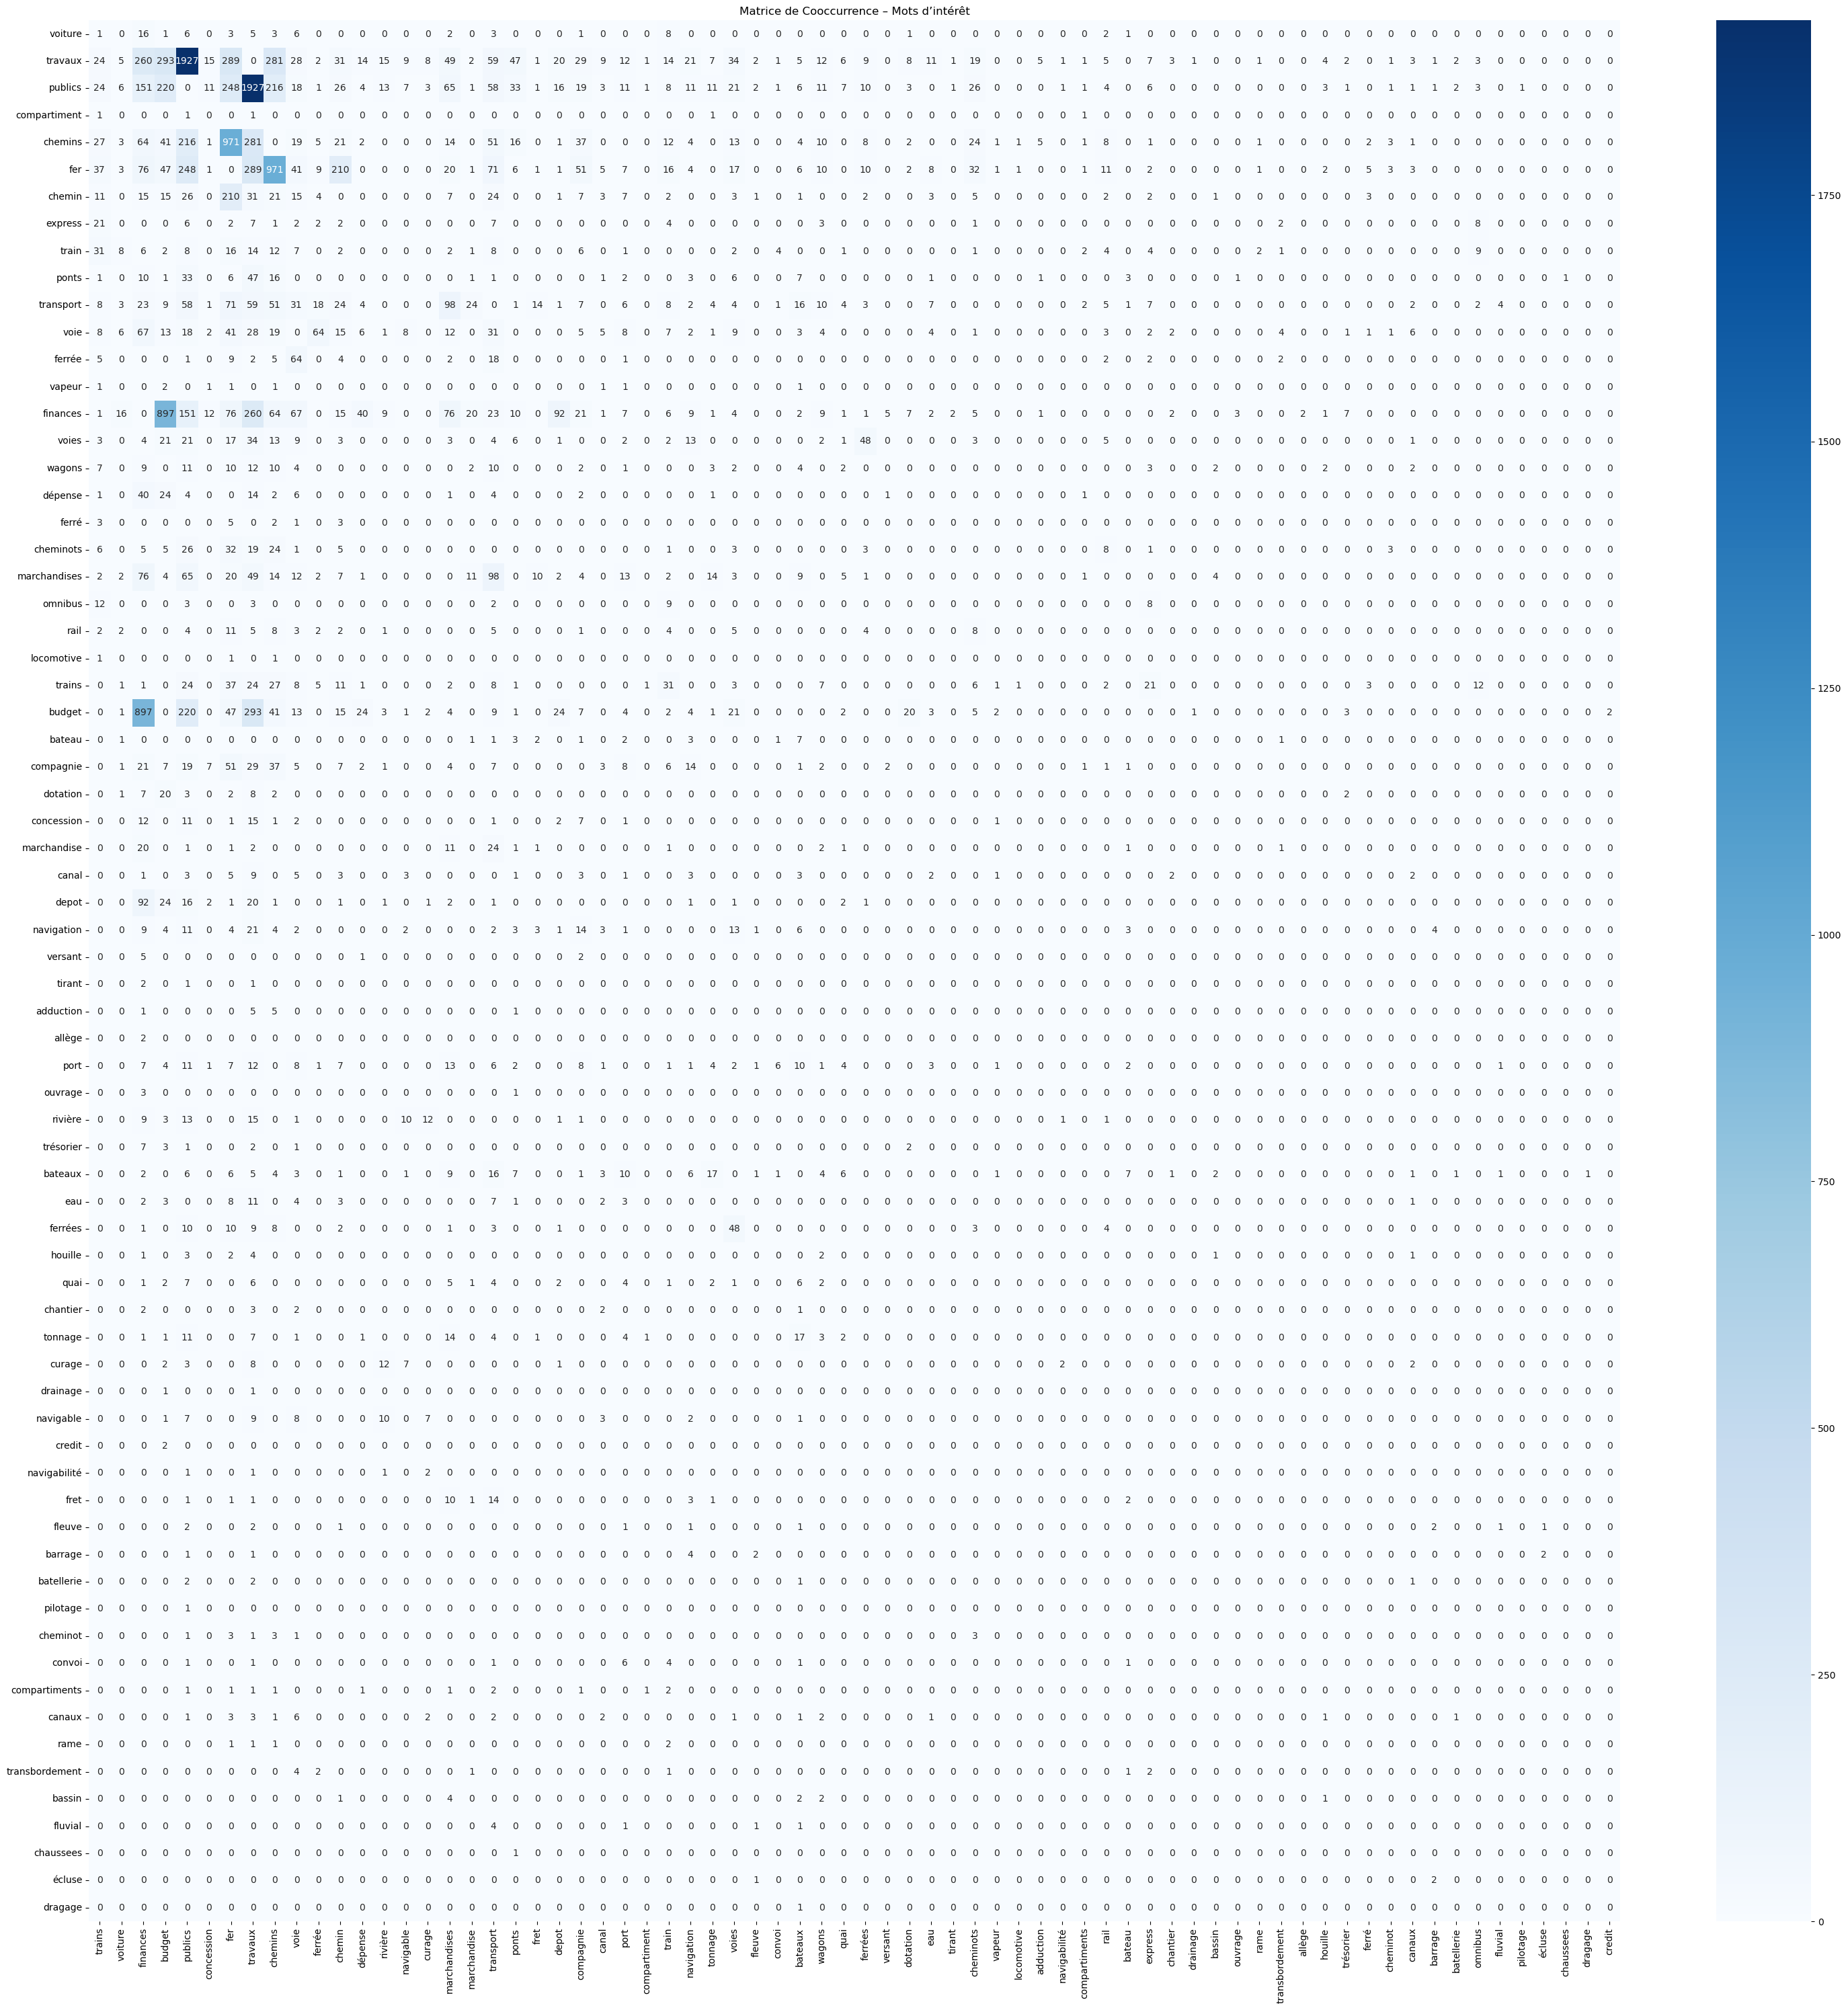

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from collections import defaultdict
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('stopwords')

def matrice_cooccurrence_complete(texte, mots_interet, taille_fenetre=10):
    tokens = word_tokenize(texte.lower())
    matrice = defaultdict(lambda: defaultdict(int))

    for i in range(len(tokens)):
        mot_central = tokens[i]
        if mot_central not in mots_interet:
            continue
        fenetre = tokens[max(0, i - taille_fenetre): i] + tokens[i+1: i+1 + taille_fenetre]
        for mot_contexte in fenetre:
            if mot_contexte in mots_interet and mot_central != mot_contexte:
                matrice[mot_central][mot_contexte] += 1

    df = pd.DataFrame(matrice).fillna(0).astype(int)
    return df

texte = longue_chaine

#================================================
#Attention, si la taille de la liste est trop importante, tout les mots n'appara√Ætront peut-√™tre pas dans la matrice affich√©e 
#Ci-dessous, voir la d√©finition de la taille de l'image plus bas figsize
liste_navig =["freycinet", "gabarit", "Tardieu",
              "halage", "curage", "dragage", "transbordement", "cabotage",
              "irrigation", "adduction", "drainage", "canalis√©e", "mouillage", "canalisation",
              "p√©niche",  'bateau', "bateaux", "gabare", "all√®ge", "convoi", "automoteur", "chaland", 
              'remorqueur', "bac", "fret", "tonnage",
              "tirant","√©cluse", 'fluvial', "fleuve", "rivi√®re", "affluent","riviere", "canal", "canaux",
              "bassin", "versant", "flux",
              'batellerie', 'navigable',"navigation", "navigabilit√©", "pilotage",
              "transport", "houille",  "marchandise", 
              "eau", "inondation", "barrage",  "chantier",
              "ascenseur", "embarcation", "port", "quai",
              "ponts", "chaussees","travaux", "publics", "finances", "credit", "dotation", "budget", "d√©pense","tresor","utilite",
               "amenagement","infrastructure","concession","maitrise","ouvrage","questeur","tr√©sorier","compagnie",
               

               "train", "trains", "rail", "chemin", "chemins", "fer", "chemin de fer", "voie", "voies", "ferr√©", "ferr√©e", "ferr√©s", "ferr√©es",
                "Acier", "Ballast", "Gare", "depot", "Chauffeur", "controleur", "cheminot", "cheminots",
                "Autorail", "rame", "locomotive", "electrique","vapeur",
                "voiture", "wagons",
                "compartiment", "compartiments", "express", "omnibus",
                "marchandises"
              ]

matrice_df = matrice_cooccurrence_complete(texte, liste_navig, taille_fenetre=30)
#================================================



plt.figure(figsize=(20, 25))
sns.heatmap(matrice_df, annot=True, cmap='Blues', fmt='d', cbar=True)
plt.title("Matrice de Cooccurrence ‚Äì Mots d‚Äôint√©r√™t")
plt.xticks(rotation=90, fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()


In [ ]:
import os
from tqdm import tqdm 


def ouvrir_decennie(chemin,decennie):

    #Important de r√©initialiser afin de ne pas cumuler l'information
    texte_fin = ''

    fichiers = [f for f in os.listdir(chemin) if f.endswith('.txt')]
    fichiers_decennie = []

    for fichier in fichiers:
        try:
            annee = int(fichier.split('-')[0])
            if decennie <= annee < decennie + 10:
                fichiers_decennie.append(fichier)
        except ValueError:
            print(f"Nom de fichier ignor√© : {fichier}")

    fichiers_decennie.sort()

    for fichier in tqdm(fichiers_decennie):
        chemin = os.path.join(dossier, fichier)
        with open(chemin, 'r', encoding='utf-8') as f:
            texte_fin += f.read()

    print(f"{len(fichiers_decennie)} fichiers charg√©s pour la d√©cennie {decennie}s.")
    return texte_fin


#===============================================
decennie = 1880
chemin = 'C:/Users/portable_laura/Documents/coursM1/M√©moire/Sources/ocr_sorted'

#===============================================

longue_chaine_decennie = ouvrir_decennie(chemin,decennie)


In [ ]:
import re
from tqdm import tqdm

def compter_cooccurrences_unique(texte_fin,decennie, mot1, mot2, taille_fenetre=5):
    """
    Compte les cooccurrences uniques de deux mots dans un texte.
    √Ä chaque cooccurrence d√©tect√©e, les mots cibles sont supprim√©s du texte pour √©viter les r√©p√©titions.
    """
    # Mise en minuscules et tokenisation
    texte = ouvrir_decennie(texte_fin,decennie)
    texte = texte.lower()
    mots = re.findall(r'\b\w+\b', texte)
    mots_restants = mots.copy()

    compteur = 0
    occurences = []

    i = 0
    pbar = tqdm(total=len(mots_restants) - taille_fenetre + 1, desc="Analyse en cours")

    while i <= len(mots_restants) - taille_fenetre:
        fenetre = mots_restants[i:i + taille_fenetre]

        if {mot1, mot2}.issubset(set(fenetre)):
            compteur += 1

            # Mise en √©vidence
            fenetre_mise_en_evidence = [
                f"**{mot}**" if mot == mot1 or mot == mot2 else mot for mot in fenetre
            ]
            occurences.append(" ".join(fenetre_mise_en_evidence))

            # Supprimer la premi√®re occurrence de mot1 dans la fen√™tre
            for j in range(i, i + taille_fenetre):
                if mots_restants[j] == mot1:
                    mots_restants[j] = "<supprim√©1>"
                    break

            # Supprimer la premi√®re occurrence de mot2 dans la fen√™tre
            for j in range(i, i + taille_fenetre):
                if mots_restants[j] == mot2:
                    mots_restants[j] = "<supprim√©2>"
                    break

            # Avancer de toute la fen√™tre pour √©viter chevauchement excessif
            i += taille_fenetre
            pbar.update(taille_fenetre)
        else:
            i += 1
            pbar.update(1)

    pbar.close()
    dico_decennie = {decennie:occurence}
    return compteur, occurences, dico_decennie


#==================================================

# Remplace ici par ton texte long
texte_fin = chemin  
decennie = 1880
mot1 = "travaux"
mot2 = "canal"
taille_fenetre = 30

resultat, occurences, dictionnaire_decennie = compter_cooccurrences_unique(texte_fin, chemin, mot1, mot2, taille_fenetre)
#==================================================

print(f"\nüîé Nombre de cooccurrences uniques de '{mot1}' et '{mot2}' : {resultat} pour la d√©cennie {decennie}\n")
print("üìå Fen√™tres extraites (sans r√©p√©titions) :")
for occ in occurences:
    print(f"- {occ}")


Analyse en cours: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 34462205/34462205 [01:26<00:00, 398368.83it/s]



üîé Nombre de cooccurrences uniques de 'travaux' et 'canal' : 272 pour la d√©cennie 1880

üìå Fen√™tres extraites (sans r√©p√©titions) :
- de commissaire du gouvernement pour assister le ministre des **travaux** publics devant la chambre des d√©put√©s et devant le s√©nat dans la discussion du projet de loi relatif au **canal**
- de lo ayant pour ohjt r√©tablissement d un cxnal de dombasle √† saint di√© art fer sont d√©clar√©s d utilit√© publique les **travaux** √† faire pour la construction du **canal**
- d un √©l√©ment variable de 0 0005 par kilom√®tre il prendra fin vingt ans apr√®s l ouverture du **canal** sur toute sa longueur adopt√© art 3 le ministre des **travaux**
- personne ne demandant la parole pour la discussion g√©n√©rale je donne lecture des articles art 1er sont d√©clar√©s d utilit√© publique les **travaux** √† faire pour l am√©lioration du **canal**
- articles du projet la chambre consult√©e d√©cide qu elle passe √† la discussion des articles aart 1er sont d√©clar√©s

## Appliquer la fonction √† toutes les d√©cennies : 
-> 1880
-> 1930

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Fonction de similarit√© Jaccard (avec n-grammes)
def similarite_jaccard(texte1, texte2, n=3):
    def ngrams(texte, n):
        return set(texte[i:i+n] for i in range(len(texte)-n+1))
    ngrams1 = ngrams(texte1, n)
    ngrams2 = ngrams(texte2, n)
    intersection = len(ngrams1.intersection(ngrams2))
    union = len(ngrams1.union(ngrams2))
    return intersection / union if union != 0 else 0

# Fonction pour calculer la similarit√© moyenne entre deux listes de fen√™tres
def similarite_periodes(fenetres1, fenetres2):
    similitudes = []
    for f1 in fenetres1:
        for f2 in fenetres2:
            score = similarite_jaccard(f1, f2)
            similitudes.append(score)
    return sum(similitudes) / len(similitudes) if similitudes else 0

# Exemple fictif de donn√©es : dictionnaire {p√©riode: liste de fen√™tres}



fenetres_par_periode = {
    "1900-1909": [
        "les **travaux** sur le **canal** avancent rapidement",
        "le **canal** n√©cessite plus de **travaux** urgents",
    ],
    "1910-1919": [
        "des **travaux** majeurs ont √©t√© effectu√©s sur le **canal**",
        "le **canal** est au centre des nouveaux **travaux** publics",
    ],
    "1920-1929": [
        "la modernisation du **canal** suit les **travaux** planifi√©s",
        "les **travaux** ont transform√© le paysage du **canal**",
    ],
}

# Extraire et trier les p√©riodes pour traitement
periodes = sorted(fenetres_par_periode.keys())

# Calculer la similarit√© moyenne entre toutes les paires de p√©riodes
resultats = {}
for i in range(len(periodes)):
    for j in range(i+1, len(periodes)):
        p1, p2 = periodes[i], periodes[j]
        sim = similarite_periodes(fenetres_par_periode[p1], fenetres_par_periode[p2])
        resultats[(p1, p2)] = sim

# Pr√©parer les donn√©es pour le graphique
diff_temps = []
similarites = []

# Pour la diff√©rence temporelle, on convertit la cha√Æne "1900-1909" en un entier = d√©but de la d√©cennie
def periode_to_int(p):
    return int(p.split("-")[0])

for (p1, p2), sim in resultats.items():
    diff = periode_to_int(p2) - periode_to_int(p1)
    diff_temps.append(diff)
    similarites.append(sim)

# Tracer la similarit√© en fonction de la distance temporelle
plt.figure(figsize=(8,5))
plt.scatter(diff_temps, similarites, color='blue')
plt.plot(diff_temps, similarites, color='orange', linestyle='--')
plt.title("√âvolution de la similarit√© contextuelle entre p√©riodes")
plt.xlabel("Diff√©rence temporelle (ann√©es)")
plt.ylabel("Similarit√© Jaccard moyenne")
plt.grid(True)
plt.show()
